In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-example_2.csv', 
                header = 0, index_col = 0)
data.index = data.index.map(lambda x: x[:-3])
data.index = pd.to_datetime(data.index)


In [31]:
data.head()

,dataid,use,gen,grid
localminute,,,,
2017-01-01 00:00:00,93,0.939,-0.008,0.939
2017-01-01 00:01:00,93,0.894,-0.008,0.894
2017-01-01 00:02:00,93,0.891,-0.007,0.891
2017-01-01 00:03:00,93,0.891,-0.007,0.891
2017-01-01 00:04:00,93,0.891,-0.007,0.891


In [8]:
week = 1440*7

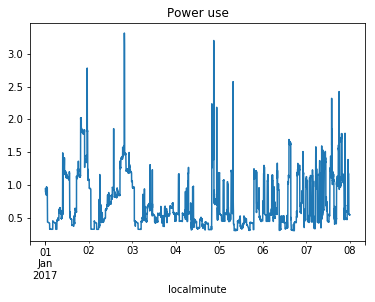

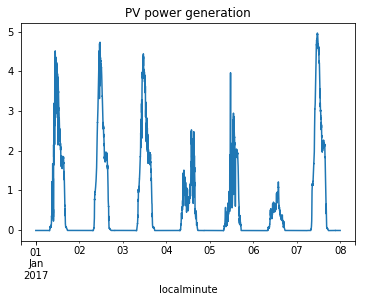

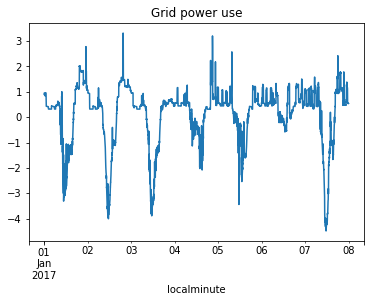

In [34]:
data['use'].iloc[:week].plot()
plt.title("Power use")
plt.show()
data['gen'].iloc[:week].plot()
plt.title("PV power generation")
plt.show()
plt.title("Grid power use")
data['grid'].iloc[:week].plot()
plt.show()

# Fourier
Since the data is fairly cyclical at a larger scale (>1 day), looking at it from a frequency perspective might prove fruitful. For the whole year we may hope to find spikes at 365 and 52.

In [93]:
generation_fourier = np.fft.fft(data['gen'])
N = generation_fourier.shape[0]

Spike at:  0
Spike at:  365
Spike at:  730
Spike at:  364
Spike at:  729
Spike at:  363
Spike at:  728
Spike at:  731
Spike at:  1


C:\Users\bfesc\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


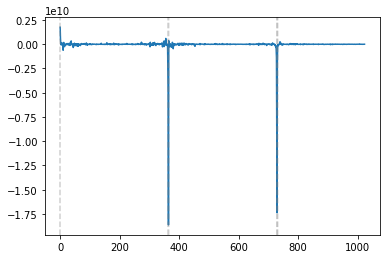

In [60]:
plt.plot(generation_fourier[1:int(N/512)]**2)
f = np.argsort(abs(generation_fourier[:int(N/2)]**2))
for i in range(1,10):
    plt.axvline(f[-i], linestyle='--',alpha=0.2,color='grey')
    print("Spike at: ", f[-i])

plt.show()

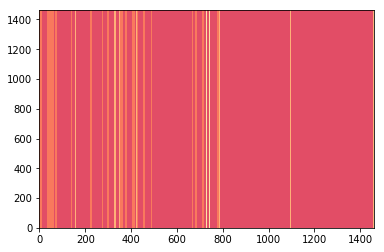

In [216]:
fz = np.zeros(np.max(f[-100:])+1)
for i in range(1,100):
    fz[f[-i]] += generation_fourier.real[i]

plt.contourf(np.tile(fz,fz.shape[0]).reshape(fz.shape[0],fz.shape[0]),cmap='magma')
plt.show()

In [28]:
net_fourier = np.fft.fft(data['grid'])
net_fourier

array([ 113967.92800000    +0.j        , -104666.06887481+46294.25082352j,
         71586.77387271-31216.20029312j, ...,
         11234.53976589-16537.6652424j ,   71586.77387271+31216.20029312j,
       -104666.06887481-46294.25082352j])

Spike at:  365
Spike at:  730
Spike at:  364
Spike at:  729
Spike at:  1
Spike at:  0
Spike at:  2
Spike at:  363
Spike at:  52


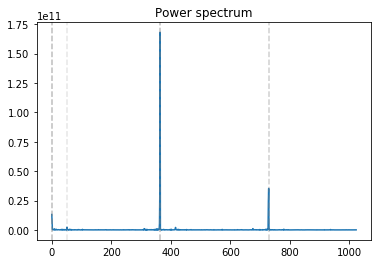

In [94]:
plt.plot(abs(net_fourier[1:int(N/512)])**2)
plt.title("Power spectrum")
f = np.argsort(abs(net_fourier[:int(N/2)])**2)
for i in range(1,10):
    plt.axvline(f[-i], linestyle='--',alpha=0.2,color='grey')
    print("Spike at: ", f[-i])

plt.show()

In the use patterns, the week is visible (52). This makes perfect sense, since solar panels don't care about the week day, whereas humans do.

In [62]:
consumption_fourier = np.fft.fft(data['use'])
consumption_fourier

array([ 523220.59200000    +0.j        , -146484.41836013+43981.16242215j,
         39937.46963836-50756.52935825j, ...,
          -665.16214018-13662.99830889j,   39937.46963836+50756.52935825j,
       -146484.41836013-43981.16242215j])

Spike at:  0
Spike at:  365
Spike at:  1
Spike at:  364
Spike at:  2
Spike at:  366
Spike at:  730
Spike at:  729
Spike at:  52


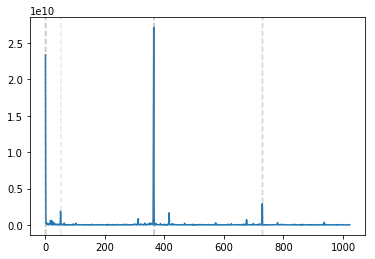

In [95]:
plt.plot(abs(consumption_fourier[1:int(N/512)])**2)
f = np.argsort(abs(consumption_fourier[:int(N/2)])**2)
for i in range(1,10):
    plt.axvline(f[-i], linestyle='--',alpha=0.2,color='grey')
    print("Spike at: ", f[-i])

plt.show()

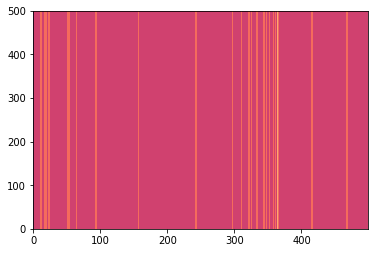

In [243]:
fz = np.zeros(np.max(f[-100:])+1)
for i in range(1,100):
    fz[f[-i]] += consumption_fourier.real[i]

plt.contourf(np.tile(fz[:500],500).reshape(500,500),cmap='magma')
plt.show()

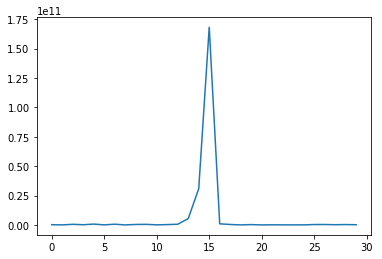

In [96]:
plt.plot(abs(net_fourier[350:380])**2)
plt.show()

In [5]:
data_nopv = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-no-pv-3.csv', 
                header = 0, index_col = 0)
data_nopv.index = data_nopv.index.map(lambda x: x[:-3])
data_nopv.index = pd.to_datetime(data_nopv.index)

data_nopv2 = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-no-pv.csv', 
                header = 0, index_col = 0)
data_nopv2.index = data_nopv2.index.map(lambda x: x[:-3])
data_nopv2.index = pd.to_datetime(data_nopv2.index)

data_nopv3 = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-no-pv-2.csv', 
                header = 0, index_col = 0)
data_nopv3.index = data_nopv3.index.map(lambda x: x[:-3])
data_nopv3.index = pd.to_datetime(data_nopv3.index)

data2 = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-example_3.csv', 
                header = 0, index_col = 0)
data2.index = data2.index.map(lambda x: x[:-3])
data2.index = pd.to_datetime(data2.index)


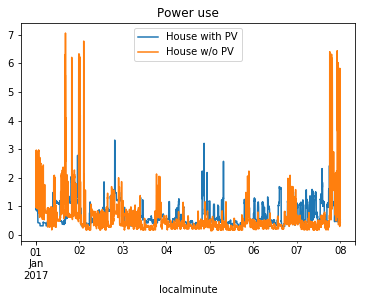

In [282]:
data['use'].iloc[:week].plot()
data_nopv['use'].iloc[:week].plot()
plt.title("Power use")
plt.legend(["House with PV","House w/o PV"])
plt.show()

Spike at:  0
Spike at:  1
Spike at:  365
Spike at:  52
Spike at:  2
Spike at:  730
Spike at:  364
Spike at:  313
Spike at:  729


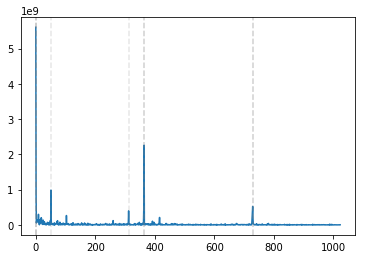

In [97]:
net_fourier_nopv = np.fft.fft(data_nopv['grid'])
plt.plot(abs(net_fourier_nopv[1:int(N/512)])**2)
f = np.argsort(abs(net_fourier_nopv[:int(N/2)])**2)
for i in range(1,10):
    plt.axvline(f[-i], linestyle='--',alpha=0.2,color='grey')
    print("Spike at: ", f[-i])

plt.show()

C:\Users\bfesc\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


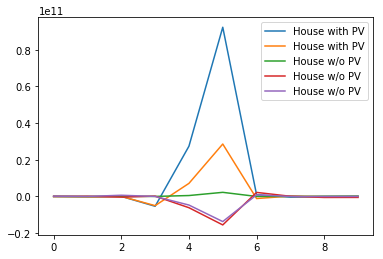

In [68]:
net_fourier_nopv2 = np.fft.fft(data_nopv2['use'])
net_fourier_nopv3 = np.fft.fft(data_nopv3['grid'])
net_fourier2 = np.fft.fft(data2['grid'])

start = 360
end = 370

plt.plot(net_fourier[start:end]**2)#/np.max(net_fourier.real[350:380]))
plt.plot(net_fourier2[start:end]**2)
plt.plot(net_fourier_nopv[start:end]**2)#/np.max(net_fourier_nopv.real[350:380]))
plt.plot(net_fourier_nopv2[start:end]**2)
plt.plot(net_fourier_nopv3[start:end]**2)
plt.legend(["House with PV","House with PV","House w/o PV","House w/o PV","House w/o PV"])
plt.show()

In [6]:
data_ev = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-ev.csv', 
                header = 0, index_col = 0)
data_ev.index = data_ev.index.map(lambda x: x[:-3])
data_ev.index = pd.to_datetime(data_ev.index)


## Electric vehicle

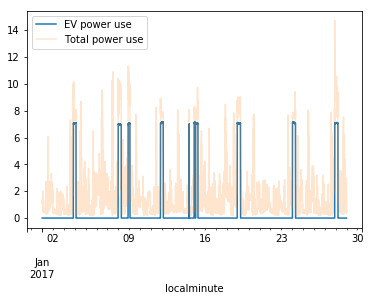

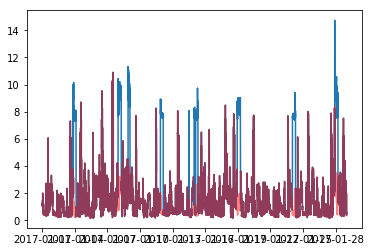

In [40]:
data_ev['car1'][:week*4].plot()
data_ev['use'][:week*4].plot(alpha=0.2)
plt.legend(["EV power use", "Total power use"])
plt.show()

plt.plot(data_ev['use'][:week*4])
plt.plot(data_ev['use'][:week*4] - data_ev['car1'][:week*4], alpha = 0.5, color='red')
plt.show()

Spike at:  0
Spike at:  365
Spike at:  730
Spike at:  90
Spike at:  364
Spike at:  729
Spike at:  1094
Spike at:  366
Spike at:  73


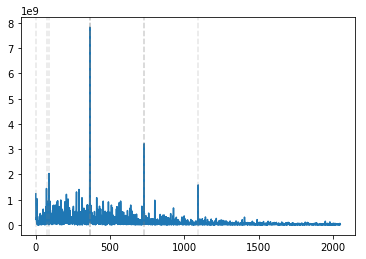

In [100]:
ev_fft = np.fft.fft(data_ev['car1'])
plt.plot(abs(ev_fft[1:int(N/256)])**2)
f = np.argsort(abs(ev_fft[:int(N/2)])**2)
for i in range(1,10):
    plt.axvline(f[-i], linestyle='--',alpha=0.2,color='grey')
    print("Spike at: ", f[-i])

plt.show()


Spike at:  0
Spike at:  1
Spike at:  2
Spike at:  365
Spike at:  730
Spike at:  366
Spike at:  364
Spike at:  729
Spike at:  312


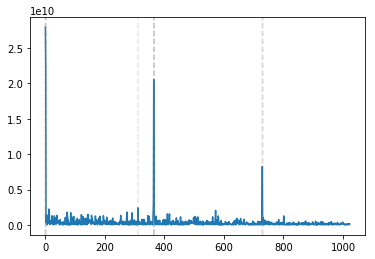

In [102]:
ev_tot_fft = np.fft.fft(data_ev['use'])
plt.plot(abs(ev_tot_fft[1:int(N/512)])**2)
f = np.argsort(abs(ev_tot_fft[:int(N/2)])**2)
for i in range(1,10):
    plt.axvline(f[-i], linestyle='--',alpha=0.2,color='grey')
    print("Spike at: ", f[-i])

plt.show()

## 1 hour resolution data

In [75]:
week_hr = int(week/60)

In [76]:
data_1hr = pd.read_csv('C:\\Users\\bfesc\\Documents\\Master_thesis\\master_data\\dataport\\dataport-1hr.csv', 
                header = 0, index_col = 0)
data_1hr.index = data_1hr.index.map(lambda x: x[:-3])
data_1hr.index = pd.to_datetime(data_1hr.index)


In [103]:
N_hr = data_1hr.shape[0]
data_1hr.head()

,dataid,use,gen,grid
localminute,,,,
2017-01-01 00:00:00,93,0.916167,-0.007617,0.916167
2017-01-01 01:00:00,93,0.459600,-0.008933,0.459600
2017-01-01 02:00:00,93,0.352217,-0.008350,0.352217
2017-01-01 03:00:00,93,0.321100,-0.008000,0.321100
2017-01-01 04:00:00,93,0.425067,-0.008933,0.425067


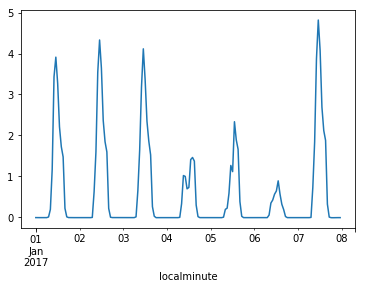

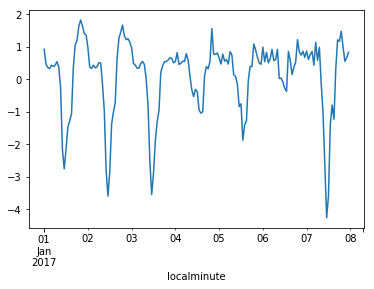

In [79]:
data_1hr['gen'][:week_hr].plot()
plt.show()
data_1hr['grid'][:week_hr].plot()
plt.show()

Spike at:  0
Spike at:  365
Spike at:  1
Spike at:  364
Spike at:  2
Spike at:  366
Spike at:  730
Spike at:  729
Spike at:  52


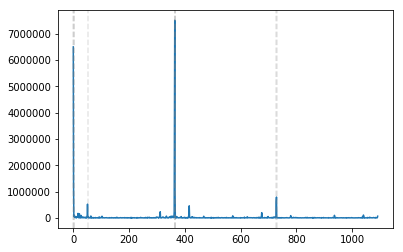

In [105]:
hr_fft = np.fft.fft(data_1hr['use'])
plt.plot(abs(hr_fft[1:int(N_hr/8)])**2)
f = np.argsort(abs(hr_fft[:int(N_hr/2)])**2)
for i in range(1,10):
    plt.axvline(f[-i], linestyle='--',alpha=0.2,color='grey')
    print("Spike at: ", f[-i])

plt.show()

1) For a whole year, how many EV chargings does the matched filter find?<br>
2) How well does it generalize to other houses/cars?<br>
3) What weatherdata is on dataport?<br>
4) understand FFT